# **Practical 2**
**Classification using Deep neural network:** Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews.Use IMDB dataset 

### Import the required libraries

In [1]:
!pip install git+https://github.com/tensorflow/tensorflow.git@v2.15.0

!pip install keras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/tensorflow/tensorflow.git (to revision v2.15.0) to c:\users\omkar\appdata\local\temp\pip-req-build-02imvbll
  Resolved https://github.com/tensorflow/tensorflow.git to commit 6887368d6d46223f460358323c4b76d61d1558a8


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/tensorflow.git 'C:\Users\OMKAR\AppData\Local\Temp\pip-req-build-02imvbll'
  Running command git checkout -q 6887368d6d46223f460358323c4b76d61d1558a8
ERROR: git+https://github.com/tensorflow/tensorflow.git@v2.15.0 does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


### Read the Data

In [4]:
df_train=pd.read_csv('test.csv')
df_val=pd.read_csv('Valid.csv')
df_train.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
df_val.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [6]:
X_train=df_train['text'].values
Y_train=df_train['label'].values

In [7]:
X_val=df_val['text'].values
Y_val=df_val['label'].values

In [8]:
(X_train.shape,Y_train.shape),(X_val.shape,Y_val.shape)

(((5000,), (5000,)), ((5000,), (5000,)))

### Analyse the Data

In [9]:
df_train.iloc[:,1].describe()

count    5000.000000
mean        0.501000
std         0.500049
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [10]:
df_val.iloc[:,1].describe()

count    5000.000000
mean        0.502800
std         0.500042
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [11]:
X_val_len=[len(str(i).split()) for i in X_val]
df1=pd.DataFrame(X_val_len,columns=['len'])
df1.describe()

,len
count,5000.00000
mean,228.93260
std,169.33721
min,10.00000
25%,126.00000
50%,171.00000
75%,274.00000
max,1601.00000


In [12]:
X_train_len=[len(str(i).split()) for i in X_train]
df=pd.DataFrame(X_train_len,columns=['len'])
df.describe()

,len
count,5000.000000
mean,231.922800
std,174.525522
min,10.000000
25%,128.000000
50%,173.000000
75%,278.000000
max,2108.000000


(array([3.218e+03, 1.231e+03, 3.470e+02, 1.230e+02, 7.800e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  10. ,  219.8,  429.6,  639.4,  849.2, 1059. , 1268.8, 1478.6,
        1688.4, 1898.2, 2108. ]),
 <BarContainer object of 10 artists>)

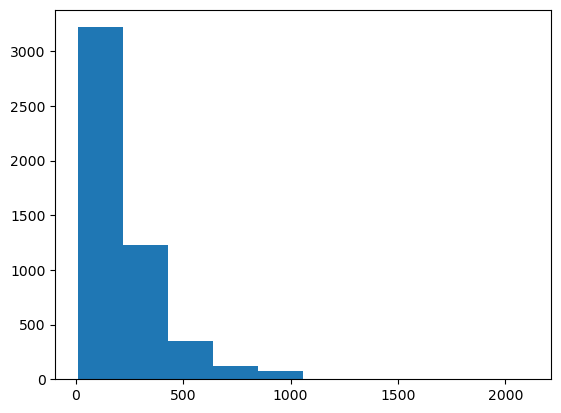

In [13]:
X_train_len=[len(str(i).split()) for i in X_train]
plt.hist(X_train_len)

(array([2.470e+03, 1.602e+03, 5.350e+02, 1.970e+02, 1.180e+02, 5.100e+01,
        2.300e+01, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  10. ,  169.1,  328.2,  487.3,  646.4,  805.5,  964.6, 1123.7,
        1282.8, 1441.9, 1601. ]),
 <BarContainer object of 10 artists>)

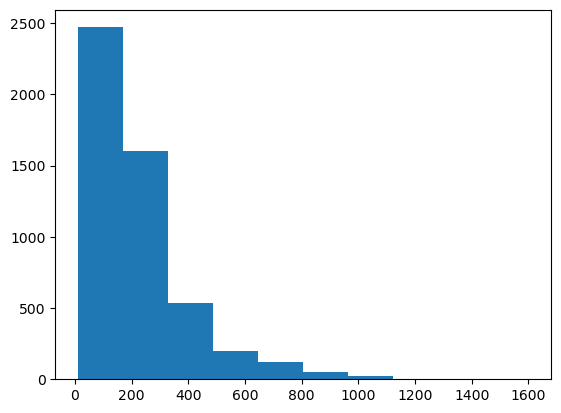

In [14]:
X_val_len=[len(str(i).split()) for i in X_val]
plt.hist(X_val_len)

### Setting the parameters

In [15]:
from tensorflow.keras.datasets import imdb
# Load the IMDb movie review dataset
(X_train, y_train), (X_val, y_val) = imdb.load_data()

# Load word index to convert integer sequences back to text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Retrieve the actual text data from integer sequences
X_train_text = [' '.join([reverse_word_index.get(i - 3, '') for i in sequence]) for sequence in X_train]
X_val_text = [' '.join([reverse_word_index.get(i - 3, '') for i in sequence]) for sequence in X_val]

# Define tokenizer and preprocess the sequences
vocab_size = 30000  #went for an average vocab size 
embedding_dimension = 64 #high dimensions would result in finding better parameters for similarity 
max_length = 120 #used a maximum length of 120 words
turnc = 'post' #preprocessing step for pad_sequences
oov_tok = '<OOV>' #oov stands for out of vocabulary tokens


###  Tokenizing  and converting the data into Sequences

In [16]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating=turnc)

X_val_seq = tokenizer.texts_to_sequences(X_val_text)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating=turnc)

In [17]:
X_train_padded.shape,X_val_padded.shape

((25000, 120), (25000, 120))

### The Model

In [18]:
from tensorflow.keras.layers import LSTM, Bidirectional, Embedding, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential()
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dimension, input_shape=(max_length,))
model.add(embedding_layer)
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(120, activation='tanh', return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(120, activation='tanh', return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

c:\Users\OMKAR\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 120, 64)        │     1,920,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 120, 64)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 120, 240)       │       177,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 240)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 240)            │       346,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │        72,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,516,761 (9.60 MB)

 Trainable params: 2,516,761 (9.60 MB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
hist=model.fit(X_train_padded,y_train,epochs=7,batch_size=16,validation_data=(X_val_padded,y_val))#10 #best at 9

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 66ms/step - accuracy: 0.6358 - loss: 0.6113 - val_accuracy: 0.8173 - val_loss: 0.4274
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.8473 - loss: 0.3688 - val_accuracy: 0.8267 - val_loss: 0.4043
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.8754 - loss: 0.3198 - val_accuracy: 0.8298 - val_loss: 0.3819
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.8921 - loss: 0.2845 - val_accuracy: 0.8133 - val_loss: 0.4638
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.9030 - loss: 0.2585 - val_accuracy: 0.8335 - val_loss: 0.4463
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.9111 - loss: 0.2346 - val_accuracy: 0.8265 - val_loss: 0.4702
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.9228 - loss: 0.2125 - val_accuracy: 0.8299 - val_loss: 0.5135


In [20]:
hist=model.fit(X_train_padded,y_train,epochs=2,batch_size=16,validation_data=(X_val_padded,y_val))#10 #best at 9

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.9348 - loss: 0.1862 - val_accuracy: 0.8202 - val_loss: 0.4178
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.9452 - loss: 0.1585 - val_accuracy: 0.8029 - val_loss: 0.4721


### This Plot is for the last two Epochs

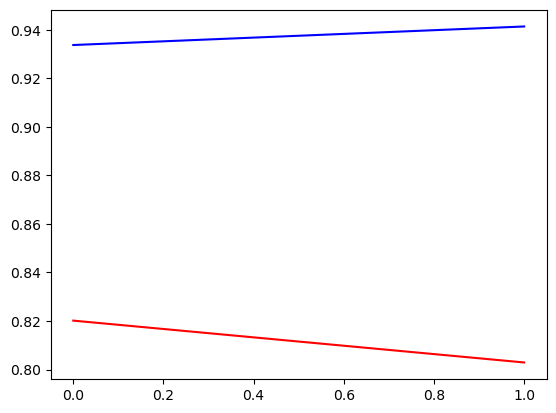

In [21]:
plt.plot(hist.history['accuracy'],c='b')
plt.plot(hist.history['val_accuracy'],c='r')
plt.show()

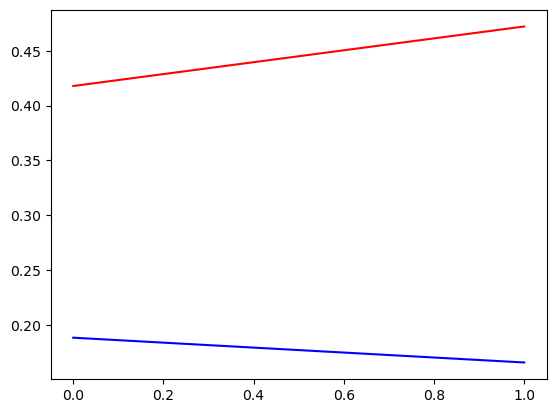

In [22]:
plt.plot(hist.history['loss'],c='b')
plt.plot(hist.history['val_loss'],c='r')
plt.show()

### Reading the Test Data

In [23]:
df_test=pd.read_csv('Test.csv')
df_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [25]:
X_test=df_test['text'].values
Y_test=df_test['label'].values

### Converting into Sequential Data

In [26]:
X_test_seq=tokenizer.texts_to_sequences(X_test)

In [27]:
X_test_padded=pad_sequences(X_test_seq,maxlen=max_length,padding='post',truncating=turnc)
X_test_padded[0]

array([   11,   208,  1040,    12,   199,   123,    15,   110,     4,
         598,  7221,  3338,    86,  1239,  5390,    14,   573,     9,
          10,     3,  2697,    19,    93,    29,   249,     4,  1576,
       13809,  3847,   101,     4,   426,  5744,   498,  1052,    11,
        1703,    13,     2,  2951,    14,    30,     2,    94,    21,
           2,    83,   497,     5,     2,   671,   818,   148,    11,
          98,    26,    41,  1838,    54,     3,  2530,   636,     2,
         671,     6,    77,     2,  2951,    40,    58,     6,     2,
         246,     6,   469,     2,  1306,    19,    93,   136,    22,
          41,    77,    54,     3,  1133,   636,     2,   702,     6,
         104,   246,     9,   158,  1109,  4764,     6,    13,    11,
         299,    36,    11,   870,     6,    41,  3250,  2704,    21,
           2,  5734,     3,   191,   842,  1947,    67,     9,  1132,
          16,    70,    49])

In [28]:
X_test_padded.shape

(5000, 120)

In [29]:
model.evaluate(X_test_padded,Y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8739 - loss: 0.2899


[0.3024078905582428, 0.8726000189781189]

### Check for your own Reviews

In [30]:
def Check(x):
    turnc = 'post'  # Define the truncating method, e.g., 'post' or 'pre'
    test_case1 = [x]
    test_case = tokenizer.texts_to_sequences(test_case1)
    max_sequence_length = 120  # Define the maximum sequence length expected by the model
    test_case_padded = pad_sequences(test_case, maxlen=max_sequence_length, padding='post', truncating=turnc)
    predict_x = model.predict(test_case_padded) 
    print(predict_x)
    if predict_x >= 0.5:
        print("Positive")
    else:
        print("Negative")


In [36]:
test_review=str(input("Enter the review :  "))
Check(test_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.949182]]
Positive


### I just checked for one random imdb review 

In [37]:
test_review="You will get A to Z all details of this scam, i may be wrong but due to this series, i don't think that i need to watch the upcoming movie big bull because 2 to 3 hours too less for explain the story. If you are at home, just watch this web series, you will not bore for even 1 second, All actors played their role excellently, i like reporter character as w"
Check(test_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.8965402]]
Positive
